# Early stopping - Softmax regression

In [284]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [275]:
iris = datasets.load_iris()

In [276]:
def calc_prob(theta,x):
    '''logits = x.dot(theta)
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums'''
    ex = np.exp(x.dot(theta))
    return ex/np.sum(ex)

In [277]:
def softmax_predict(theta, Xt):
    return np.argmax(Xt.dot(theta),axis=1)

In [290]:
X = iris['data'][:,(2,3)]
y = iris['target']

X_bias = np.c_[np.ones((len(X),1)),X]

X_train, X_val, y_train, y_val = train_test_split(X_bias, y, test_size=0.2, random_state=2042)


m = X_train.shape[0]
n = X_train.shape[1]
k = len(np.unique(y_train))

y_train_onehot = np.zeros((m, k))

for li in range(m):
    y_train_onehot[li,y_train[li]] = 1

In [291]:
np.random.seed(2042)
theta = np.random.randn(n,k) #Random start #Columns: classes (k) | Lines: params for class (k)
n_epochs = 5000
eta = 0.01
sc_max = 0
accur = []
for epoch in range(n_epochs):
    #Calculating the accuracy in the validation set
    sc = np.mean(softmax_predict(theta, X_val) == y_val)
    if (sc > sc_max):
        best_theta = theta.copy()
        sc_max = sc
    accur.append(sc)
    #Calculating the gradient
    gradi = np.zeros((n,k))
    for i in range(m):
        xi = X_train[[i]] #Keep np.array structure, not list
        yi = y_train_onehot[i]
        pks = calc_prob(theta, xi)
        dpks =  pks - yi
        gradi += xi.T.dot(dpks)/m
    theta = theta - eta*gradi

print('Best_Score: ', sc_max)
print('Best theta: ',best_theta)

Best_Score:  0.9
Best theta:  [[ 4.22385492  0.85686152 -0.95641611]
 [ 0.01437754  0.71079665  0.33352873]
 [-1.67052319  0.39762729  2.8388707 ]]


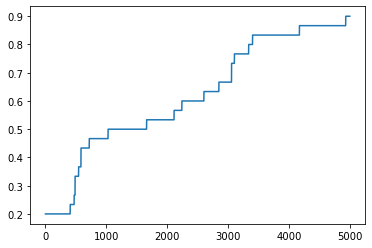

In [292]:
plt.plot(range(len(accur)), accur)